In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import pandas as pd
import random
import numpy
import splat



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
splat.VERSION

'2022.07.05'

In [3]:
df_singles = pd.read_hdf(r'C:/Users/juand/Research/spectral_templates_data_version_june20.h5', key='singles')
df_singles

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,object_name
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215337,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,2MASS J16002535-2644060
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.206600,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,2MASS J17252029-0024508
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.229087,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,2MASS J01532750+3631482
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,WISE J141143.25-452418.3
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.241278,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,2MASS J19445221-0831036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.004027,-0.007743,-0.004455,0.005451,0.001937,-0.002612,0.002762,0.003820,0.011900,0.006834,...,0.001825,0.003611,0.000533,0.003529,0.002783,0.006177,0.002361,0.000314,38.0,WISE J025409.51+022358.6
432,0.008489,0.009103,-0.001436,0.010861,0.008182,0.012516,0.011853,0.010578,0.003773,0.018182,...,-0.001485,-0.002331,-0.003116,0.000461,0.004334,0.003893,0.004213,0.000512,38.0,2MASSI J0415195-093506
433,-0.004778,0.078588,0.011728,-0.005535,0.033752,0.007601,-0.034531,-0.006146,-0.020120,0.007291,...,0.002653,0.000853,0.002269,-0.005126,0.019522,-0.002011,-0.015760,0.007481,37.0,WISE J132233.64-234016.8
434,0.073008,0.009225,-0.005804,-0.039170,-0.014236,-0.015112,0.038132,-0.001542,-0.009924,0.014488,...,0.011270,0.002495,-0.008254,-0.004863,0.001008,0.001313,0.001250,0.006463,38.0,WISE J222623.05+044004.0


In [4]:
num_class=[]
for i in range(len(df_singles)):
    num_class.append(0)

df_singles["num_class"]=num_class
del df_singles["object_name"]

In [5]:
df_singlesCut = df_singles.copy()

In [6]:
df_singlesCut = df_singlesCut.loc[df_singlesCut['spectral_type'] < 28]
df_singlesCut = df_singlesCut.loc[df_singlesCut['spectral_type'] > 16]
df_singlesCut = df_singlesCut.reset_index()
del df_singlesCut["index"]
df_singlesCut

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.157152,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.223195,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,0
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192871,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,0
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.251165,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,0
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.177882,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.091815,0.040935,0.080627,0.094314,0.098135,0.097049,0.162924,0.124603,0.119426,0.174763,...,0.303245,0.314644,0.298030,0.298126,0.305611,0.295877,0.292493,0.313691,25.0,0
224,0.015546,0.005483,0.025650,0.125470,0.141686,0.098963,0.041578,0.115340,0.092610,0.122965,...,0.246703,0.237024,0.245865,0.234510,0.245132,0.239613,0.236218,0.274649,26.0,0
225,0.100953,0.175887,0.147420,0.156246,0.168440,0.173606,0.187552,0.205193,0.249264,0.211953,...,0.246410,0.248193,0.227962,0.236145,0.232735,0.239658,0.238972,0.241570,26.0,0
226,0.064635,0.067172,0.069968,0.082823,0.101335,0.110372,0.102538,0.107109,0.129952,0.138813,...,0.212058,0.210687,0.207319,0.208570,0.210931,0.211042,0.209572,0.208942,27.0,0


In [7]:
interpol_flux=[]
for j in range(len(df_singlesCut)):
    a=[]
    for i in range(441):
        a.append(df_singlesCut["flux_" + str(i)][j])
    interpol_flux.append(a)
df_singlesCut["interpol_flux"]=interpol_flux

In [8]:
df_singlesCut

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.091815,0.040935,0.080627,0.094314,0.098135,0.097049,0.162924,0.124603,0.119426,0.174763,...,0.314644,0.298030,0.298126,0.305611,0.295877,0.292493,0.313691,25.0,0,"[0.09181530835507652, 0.04093481195454178, 0.0..."
224,0.015546,0.005483,0.025650,0.125470,0.141686,0.098963,0.041578,0.115340,0.092610,0.122965,...,0.237024,0.245865,0.234510,0.245132,0.239613,0.236218,0.274649,26.0,0,"[0.015546135336049005, 0.005482591449850909, 0..."
225,0.100953,0.175887,0.147420,0.156246,0.168440,0.173606,0.187552,0.205193,0.249264,0.211953,...,0.248193,0.227962,0.236145,0.232735,0.239658,0.238972,0.241570,26.0,0,"[0.10095255337089246, 0.1758866808270969, 0.14..."
226,0.064635,0.067172,0.069968,0.082823,0.101335,0.110372,0.102538,0.107109,0.129952,0.138813,...,0.210687,0.207319,0.208570,0.210931,0.211042,0.209572,0.208942,27.0,0,"[0.06463534571294974, 0.06717209842600344, 0.0..."


In [22]:
noise_fluxes = []
noise_type = []
for j in range(19):
    for i in range(len(df_singlesCut)):
        flux = df_singlesCut["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_singlesCut["spectral_type"][i])

In [23]:
df_singles_noise = pd.DataFrame({"spectral_type": noise_type})
df_singles_noise["interpol_flux"] = noise_fluxes

In [24]:
df_singles_noise

,spectral_type,interpol_flux
0,17.0,"[0.45562490743506423, 0.621364406440828, 0.601..."
1,17.0,"[0.34393019367617184, 0.41326227297208157, 0.4..."
2,17.0,"[0.44858191099175243, 0.5595059272577333, 0.68..."
3,17.0,"[0.43591071787365065, 0.48134321917325273, 0.6..."
4,17.0,"[0.36127276598056784, 0.37499143209220787, 0.6..."
...,...,...
4327,25.0,"[0.1602622078561074, -0.03404109808502759, 0.0..."
4328,26.0,"[0.07309704800883553, -0.012321250886549812, 0..."
4329,26.0,"[0.05233854273274053, 0.24100636511493556, 0.1..."
4330,27.0,"[0.09599711235217873, 0.11621451549767177, 0.0..."


In [25]:
for i in range(len(df_singles_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_singles_noise["interpol_flux"])):
        flux_i.append(df_singles_noise["interpol_flux"][j][i])
    df_singles_noise["flux"+"_"+str(i)]=flux_i

In [26]:
num_class=[]
for i in range(len(df_singles_noise)):
    num_class.append(0)
df_singles_noise["num_class"]=num_class

In [27]:
df_singles_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,num_class
0,17.0,"[0.45562490743506423, 0.621364406440828, 0.601...",0.455625,0.621364,0.601852,0.671026,0.568708,0.671590,0.664043,0.696942,...,0.218595,0.137178,0.105180,0.233594,0.142610,0.061404,0.193546,0.126011,0.198818,0
1,17.0,"[0.34393019367617184, 0.41326227297208157, 0.4...",0.343930,0.413262,0.464743,0.484838,0.493145,0.566273,0.615973,0.562422,...,0.230350,0.201342,0.276883,0.170485,0.091850,0.172328,0.229012,0.233536,0.186488,0
2,17.0,"[0.44858191099175243, 0.5595059272577333, 0.68...",0.448582,0.559506,0.689726,0.577190,0.648791,0.674144,0.788867,0.656886,...,0.132694,0.160080,0.271426,0.231840,0.142993,0.221892,0.174008,0.170214,0.109415,0
3,17.0,"[0.43591071787365065, 0.48134321917325273, 0.6...",0.435911,0.481343,0.652948,0.641799,0.633351,0.479989,0.612943,0.675676,...,0.222237,0.196184,0.280613,0.265644,0.226214,0.329636,0.228674,0.229576,0.243572,0
4,17.0,"[0.36127276598056784, 0.37499143209220787, 0.6...",0.361273,0.374991,0.608612,0.473191,0.587184,0.525570,0.542640,0.550110,...,0.198761,0.217084,0.166593,0.137710,0.197903,0.135745,0.210591,0.228667,0.184574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4327,25.0,"[0.1602622078561074, -0.03404109808502759, 0.0...",0.160262,-0.034041,0.068419,0.110328,0.113337,0.188098,0.167761,0.168217,...,0.311103,0.301462,0.274530,0.214937,0.355031,0.263258,0.284471,0.226782,0.389066,0
4328,26.0,"[0.07309704800883553, -0.012321250886549812, 0...",0.073097,-0.012321,0.006301,0.121820,0.121810,0.047752,0.099097,0.186556,...,0.259552,0.235922,0.217820,0.241777,0.244360,0.302062,0.159079,0.382670,0.280748,0
4329,26.0,"[0.05233854273274053, 0.24100636511493556, 0.1...",0.052339,0.241006,0.138414,0.188826,0.186207,0.140930,0.114627,0.158042,...,0.153866,0.263424,0.279355,0.193815,0.249312,0.352499,0.224430,0.297777,0.254129,0
4330,27.0,"[0.09599711235217873, 0.11621451549767177, 0.0...",0.095997,0.116215,0.067839,0.092726,0.145944,0.225497,0.051197,0.085848,...,0.212308,0.197381,0.224689,0.250858,0.167084,0.191829,0.233891,0.252861,0.271467,0


In [28]:
frames = [df_singlesCut, df_singles_noise]

df_singlesCutNoise = pd.concat(frames)
df_singlesCutNoise = df_singlesCutNoise.reset_index()
del df_singlesCutNoise["index"]
df_singlesCutNoise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.160262,-0.034041,0.068419,0.110328,0.113337,0.188098,0.167761,0.168217,0.069665,0.149932,...,0.274530,0.214937,0.355031,0.263258,0.284471,0.226782,0.389066,25.0,0,"[0.1602622078561074, -0.03404109808502759, 0.0..."
4556,0.073097,-0.012321,0.006301,0.121820,0.121810,0.047752,0.099097,0.186556,0.075401,0.066242,...,0.217820,0.241777,0.244360,0.302062,0.159079,0.382670,0.280748,26.0,0,"[0.07309704800883553, -0.012321250886549812, 0..."
4557,0.052339,0.241006,0.138414,0.188826,0.186207,0.140930,0.114627,0.158042,0.178516,0.287594,...,0.279355,0.193815,0.249312,0.352499,0.224430,0.297777,0.254129,26.0,0,"[0.05233854273274053, 0.24100636511493556, 0.1..."
4558,0.095997,0.116215,0.067839,0.092726,0.145944,0.225497,0.051197,0.085848,0.137625,0.128819,...,0.224689,0.250858,0.167084,0.191829,0.233891,0.252861,0.271467,27.0,0,"[0.09599711235217873, 0.11621451549767177, 0.0..."


In [16]:
interpol_flux=[]
for j in range(len(df_singles)):
    a=[]
    for i in range(441):
        a.append(df_singles["flux_" + str(i)][j])
    interpol_flux.append(a)
df_singles["interpol_flux"]=interpol_flux

In [17]:
noise_fluxes = []
noise_type = []
for j in range(9):
    for i in range(len(df_singles)):
        flux = df_singles["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_singles["spectral_type"][i])

In [18]:
df_singlesAll_noise = pd.DataFrame({"spectral_type": noise_type})
df_singlesAll_noise["interpol_flux"] = noise_fluxes

In [19]:
for i in range(len(df_singlesAll_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_singlesAll_noise["interpol_flux"])):
        flux_i.append(df_singlesAll_noise["interpol_flux"][j][i])
    df_singlesAll_noise["flux"+"_"+str(i)]=flux_i

In [20]:
num_class=[]
for i in range(len(df_singlesAll_noise)):
    num_class.append(0)
df_singlesAll_noise["num_class"]=num_class

In [21]:
df_singlesAll_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,num_class
0,16.0,"[0.4573886942847582, 0.5393412739871102, 0.606...",0.457389,0.539341,0.606299,0.676262,0.771248,0.551006,0.744584,0.722396,...,0.273057,0.160263,0.198944,0.165499,0.187096,0.112008,0.081677,0.207656,0.175014,0
1,12.0,"[0.6981143595546553, 0.6048692945118063, 0.714...",0.698114,0.604869,0.714612,0.815434,0.664341,0.756912,0.723244,0.632473,...,0.235995,0.203114,0.250568,0.231740,0.237296,0.250929,0.157019,0.168481,0.237162,0
2,15.0,"[0.39164528508286445, 0.478583588219598, 0.514...",0.391645,0.478584,0.514271,0.606558,0.656451,0.603624,0.555525,0.514544,...,0.170904,0.249894,0.171402,0.244490,0.301922,0.255399,0.171454,0.177508,0.203958,0
3,17.0,"[0.5134460599117041, 0.7004506007602904, 0.580...",0.513446,0.700451,0.580915,0.642451,0.653689,0.739254,0.739444,0.637800,...,0.167165,0.106659,0.124236,0.130301,0.132890,0.100913,0.106639,0.235230,0.078225,0
4,13.0,"[0.5272450894571362, 0.5655498012736487, 0.638...",0.527245,0.565550,0.638086,0.572135,0.626056,0.744362,0.585437,0.633713,...,0.254232,0.306649,0.348852,0.203554,0.252202,0.263662,0.228772,0.286379,0.304329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,38.0,"[-0.022943180979147777, -0.02056206878830382, ...",-0.022943,-0.020562,0.027615,0.000822,0.012715,-0.031163,0.010114,-0.008908,...,0.001612,-0.011380,0.003693,0.005192,-0.001078,0.008283,-0.034038,0.040986,-0.025088,0
3920,38.0,"[-0.03628597970853474, 0.08310969965384203, 0....",-0.036286,0.083110,0.001781,-0.000058,0.074369,-0.008645,0.001580,0.002837,...,-0.039100,0.056453,0.043709,-0.023664,0.077174,0.061183,-0.100231,0.097586,-0.048782,0
3921,37.0,"[-0.01724713501257947, 0.08750484245590084, 0....",-0.017247,0.087505,0.005800,0.003255,0.045226,-0.008457,-0.038840,0.000908,...,-0.025432,-0.014535,0.045081,0.040266,0.001678,0.007472,0.027815,-0.078096,-0.016319,0
3922,38.0,"[0.012557979644051573, -0.004463319634179886, ...",0.012558,-0.004463,-0.000088,0.032682,0.032914,-0.008290,0.037016,-0.070234,...,-0.006283,0.098230,-0.061323,0.020763,0.060592,-0.011121,0.011640,0.060785,-0.043757,0


In [29]:
frames = [df_singles, df_singlesAll_noise]

df_singlesNoise = pd.concat(frames)
df_singlesNoise = df_singlesNoise.reset_index()
del df_singlesNoise["index"]
df_singlesNoise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,0,"[0.4945521009198528, 0.5660506093339908, 0.614..."
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,0,"[0.6345121852958099, 0.657555962706047, 0.7148..."
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,0,"[0.4938933093401029, 0.5500692660287466, 0.571..."
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,0,"[0.46281527653083354, 0.5359644897431577, 0.58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,-0.022943,-0.020562,0.027615,0.000822,0.012715,-0.031163,0.010114,-0.008908,0.000372,0.083012,...,0.003693,0.005192,-0.001078,0.008283,-0.034038,0.040986,-0.025088,38.0,0,"[-0.022943180979147777, -0.02056206878830382, ..."
4356,-0.036286,0.083110,0.001781,-0.000058,0.074369,-0.008645,0.001580,0.002837,-0.063179,0.101557,...,0.043709,-0.023664,0.077174,0.061183,-0.100231,0.097586,-0.048782,38.0,0,"[-0.03628597970853474, 0.08310969965384203, 0...."
4357,-0.017247,0.087505,0.005800,0.003255,0.045226,-0.008457,-0.038840,0.000908,-0.021454,0.058393,...,0.045081,0.040266,0.001678,0.007472,0.027815,-0.078096,-0.016319,37.0,0,"[-0.01724713501257947, 0.08750484245590084, 0...."
4358,0.012558,-0.004463,-0.000088,0.032682,0.032914,-0.008290,0.037016,-0.070234,-0.048584,0.060309,...,-0.061323,0.020763,0.060592,-0.011121,0.011640,0.060785,-0.043757,38.0,0,"[0.012557979644051573, -0.004463319634179886, ..."


In [75]:
df_binaries = pd.read_hdf(r'C:/Users/juand/Research/spectral_templates_data_version_june20.h5', key='binaries')
df_binaries

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [76]:
num_class=[]
for i in range(len(df_binaries)):
    num_class.append(1)
df_binaries["num_class"]=num_class

In [77]:
df_binaries["spectral_type"]=df_binaries["system_type"]
del df_binaries["system_type"]
df_binaries

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,1,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,1,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,1,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,1,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,1,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,1,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,1,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,1,39.0


In [100]:
df_binaries1 = df_binaries.copy()

In [101]:
df_binaries1 = df_binaries1.loc[df_binaries1['primary_type'] < 28]
df_binaries1 = df_binaries1.loc[df_binaries1['primary_type'] > 16]
df_binaries1 = df_binaries1.loc[df_binaries1['secondary_type'] > 30]
df_binaries1 = df_binaries1.loc[df_binaries1['secondary_type'] < 39]
df_binaries1 = df_binaries1.reset_index()
del df_binaries1["index"]
df_binaries1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type
0,0.493893,0.550069,0.571380,0.647315,0.666166,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,17.0,31.0,1,16.0
1,0.351351,0.404010,0.458808,0.494069,0.524599,0.571850,0.578583,0.584094,0.579003,0.572694,...,0.223440,0.220150,0.209722,0.208115,0.201419,0.207814,17.0,31.0,1,16.0
2,0.342881,0.395269,0.451184,0.488437,0.518428,0.564841,0.570936,0.576439,0.570763,0.563745,...,0.228195,0.224661,0.214164,0.213078,0.206306,0.212578,17.0,31.0,1,17.0
3,0.348187,0.401325,0.456690,0.492681,0.524107,0.572395,0.579060,0.583834,0.577111,0.569891,...,0.227011,0.223767,0.212970,0.211417,0.204462,0.210968,17.0,31.0,1,17.0
4,0.350210,0.401207,0.457209,0.486718,0.516109,0.568047,0.574545,0.577777,0.569560,0.566788,...,0.227315,0.224216,0.213625,0.211873,0.204926,0.211351,17.0,32.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,20.0,38.0,1,36.0
7385,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,20.0,38.0,1,36.0
7386,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,20.0,38.0,1,37.0
7387,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,20.0,38.0,1,36.0


In [102]:
interpol_flux=[]
for j in range(len(df_binaries1)):
    a=[]
    for i in range(441):
        a.append(df_binaries1["flux_" + str(i)][j])
    interpol_flux.append(a)
df_binaries1["interpol_flux"]=interpol_flux

In [103]:
df_binaries1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type,interpol_flux
0,0.493893,0.550069,0.571380,0.647315,0.666166,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.211384,0.202791,0.202994,0.216542,0.211448,17.0,31.0,1,16.0,"[0.4938933374928867, 0.5500693256333914, 0.571..."
1,0.351351,0.404010,0.458808,0.494069,0.524599,0.571850,0.578583,0.584094,0.579003,0.572694,...,0.220150,0.209722,0.208115,0.201419,0.207814,17.0,31.0,1,16.0,"[0.35135114533840917, 0.40401023636820693, 0.4..."
2,0.342881,0.395269,0.451184,0.488437,0.518428,0.564841,0.570936,0.576439,0.570763,0.563745,...,0.224661,0.214164,0.213078,0.206306,0.212578,17.0,31.0,1,17.0,"[0.3428812308474753, 0.39526902292461824, 0.45..."
3,0.348187,0.401325,0.456690,0.492681,0.524107,0.572395,0.579060,0.583834,0.577111,0.569891,...,0.223767,0.212970,0.211417,0.204462,0.210968,17.0,31.0,1,17.0,"[0.3481866853397901, 0.40132453100500104, 0.45..."
4,0.350210,0.401207,0.457209,0.486718,0.516109,0.568047,0.574545,0.577777,0.569560,0.566788,...,0.224216,0.213625,0.211873,0.204926,0.211351,17.0,32.0,1,17.0,"[0.3502095488988858, 0.40120732967433803, 0.45..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.010464,0.016650,0.016825,0.014270,0.018371,20.0,38.0,1,36.0,"[0.006509890312396639, 0.023606524488617657, 0..."
7385,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.010398,0.016614,0.016746,0.014248,0.018351,20.0,38.0,1,36.0,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7386,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,0.008219,0.007920,-0.002682,-0.000897,-0.000275,20.0,38.0,1,37.0,"[0.004678941897092824, 0.0053383172777176895, ..."
7387,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.012207,0.022031,0.011638,0.009572,0.024643,20.0,38.0,1,36.0,"[0.05117170015118864, -0.015936106783344534, -..."


In [104]:
df_binaries1sample = df_binaries1.sample(frac=0.2, replace=False, random_state=1)
df_binaries1sample = df_binaries1sample.reset_index()
del df_binaries1sample["index"]
df_binaries1sample

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type,interpol_flux
0,6.555245e-02,4.890692e-02,2.520553e-02,3.311281e-02,-2.850782e-02,4.494851e-03,8.190056e-02,3.954523e-02,5.066244e-02,2.026832e-02,...,2.832307e-01,2.664139e-01,2.843948e-01,2.790293e-01,2.777627e-01,27.0,36.0,1,29.0,"[0.06555244986299906, 0.04890692142348671, 0.0..."
1,1.025525e-03,2.169515e-03,2.081647e-03,6.065581e-04,5.735182e-04,-9.040628e-05,7.137278e-04,7.236675e-05,2.135422e-04,3.505781e-04,...,3.940586e-04,1.381141e-04,-1.711203e-04,-9.016090e-05,4.170645e-04,20.0,37.0,1,34.0,"[0.001025525357383154, 0.0021695154567784886, ..."
2,1.522283e-01,1.917140e-01,2.246140e-01,2.734351e-01,3.031819e-01,3.212685e-01,3.179276e-01,3.218121e-01,3.406440e-01,3.429325e-01,...,2.393630e-01,2.338935e-01,2.388058e-01,2.341784e-01,2.375452e-01,25.0,38.0,1,19.0,"[0.15222831855825328, 0.19171402496921885, 0.2..."
3,3.481867e-01,4.013245e-01,4.566902e-01,4.926806e-01,5.241071e-01,5.723954e-01,5.790601e-01,5.838339e-01,5.771106e-01,5.698911e-01,...,2.237668e-01,2.129703e-01,2.114171e-01,2.044625e-01,2.109679e-01,17.0,38.0,1,17.0,"[0.3481866853408335, 0.4013245310062236, 0.456..."
4,-1.000444e-11,-8.780361e-12,-7.547969e-12,-6.306827e-12,-5.056936e-12,-3.798733e-12,-2.532217e-12,-1.256952e-12,2.706307e-14,1.319828e-12,...,1.364623e-12,1.235989e-12,1.445288e-12,1.397059e-12,1.414450e-12,20.0,33.0,1,32.0,"[-1.0004440446498776e-11, -8.780360776373068e-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,3.409230e-01,3.804457e-01,4.258100e-01,4.684581e-01,5.184064e-01,5.395054e-01,5.349901e-01,5.368239e-01,5.387570e-01,5.436946e-01,...,2.256350e-01,2.234635e-01,2.264131e-01,2.277333e-01,2.229160e-01,18.0,32.0,1,18.0,"[0.3409230133186621, 0.38044571596498167, 0.42..."
1474,2.413041e-01,1.548437e-01,1.121905e-01,2.008466e-01,2.193055e-01,2.255251e-01,3.039005e-01,2.738276e-01,1.993184e-01,2.462057e-01,...,2.965851e-01,3.089239e-01,3.215601e-01,3.135334e-01,2.969504e-01,21.0,32.0,1,21.0,"[0.24130407169236756, 0.15484371299924754, 0.1..."
1475,4.496269e-14,6.432348e-14,1.221507e-13,1.278082e-13,4.125887e-15,-1.835884e-14,7.185808e-15,1.691884e-14,6.318816e-14,5.196463e-14,...,6.407320e-15,1.560340e-14,1.005349e-14,1.399741e-14,8.424792e-15,20.0,38.0,1,34.0,"[4.496268644019879e-14, 6.432348451690732e-14,..."
1476,2.822050e-01,3.422440e-01,3.957407e-01,4.184995e-01,4.533676e-01,4.819309e-01,4.760680e-01,4.757153e-01,4.704896e-01,4.728209e-01,...,2.174085e-01,2.130872e-01,2.074110e-01,2.098692e-01,2.150378e-01,18.0,35.0,1,18.0,"[0.2822050040232709, 0.3422440277089845, 0.395..."


In [105]:
noise_fluxes = []
noise_type = []
for j in range(9):
    for i in range(len(df_binaries1sample)):
        flux = df_binaries1sample["interpol_flux"][i]
        noise_fluxes.append(flux+numpy.random.normal(0,0.05*numpy.nanmax(flux),len(flux)))
        noise_type.append(df_binaries1sample["spectral_type"][i])

In [106]:
df_binaries1sample_noise = pd.DataFrame({"spectral_type": noise_type})
df_binaries1sample_noise["interpol_flux"] = noise_fluxes

In [107]:
for i in range(len(df_binaries1sample_noise["interpol_flux"][0])):
    flux_i =[]
    for j in range(len(df_binaries1sample_noise["interpol_flux"])):
        flux_i.append(df_binaries1sample_noise["interpol_flux"][j][i])
    df_binaries1sample_noise["flux"+"_"+str(i)]=flux_i

In [321]:
num_class=[]
for i in range(len(df_binaries1sample_noise)):
    num_class.append(1)
df_binaries1sample_noise["num_class"]=num_class

In [322]:
df_binaries1sample_noise

,spectral_type,interpol_flux,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,...,flux_432,flux_433,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,num_class
0,29.0,"[-0.047437224043946125, 0.010024755386295742, ...",-0.047437,0.010025,0.010038,0.070936,-0.042133,-0.030752,0.103476,0.061627,...,0.171750,0.328194,0.325695,0.269374,0.322359,0.307709,0.289095,0.373150,0.271028,1
1,34.0,"[0.07926833780975177, 0.0849276813724039, 0.02...",0.079268,0.084928,0.023702,0.031302,-0.011418,-0.038100,-0.010916,0.024721,...,-0.049133,-0.034751,0.067287,-0.034583,0.003370,-0.073751,0.024717,0.008093,0.022945,1
2,19.0,"[0.0929634218135134, 0.3290213817535191, 0.159...",0.092963,0.329021,0.159408,0.240068,0.249291,0.260627,0.280139,0.291929,...,0.331982,0.231840,0.285256,0.260737,0.207944,0.224854,0.292783,0.208308,0.284744,1
3,17.0,"[0.36119928501656545, 0.4376604681256495, 0.35...",0.361199,0.437660,0.353647,0.534856,0.588376,0.576348,0.605960,0.564898,...,0.197945,0.172842,0.253983,0.192274,0.209161,0.365061,0.268321,0.253301,0.291351,1
4,32.0,"[-0.041424823059700966, 0.08901694135646973, 0...",-0.041425,0.089017,0.010546,-0.157675,-0.056023,0.093493,-0.026715,0.020155,...,0.094556,0.048738,-0.067050,-0.051970,0.069400,0.015900,0.050422,0.019943,0.023181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,18.0,"[0.33132895732272327, 0.41031730570384006, 0.4...",0.331329,0.410317,0.429371,0.442537,0.514140,0.587172,0.468663,0.597934,...,0.253076,0.288972,0.215043,0.237498,0.221111,0.179338,0.339348,0.214001,0.234565,1
13298,21.0,"[0.2013289365717785, 0.14036581264096243, 0.08...",0.201329,0.140366,0.084990,0.162667,0.177580,0.205971,0.368848,0.240787,...,0.333362,0.374716,0.314208,0.234432,0.382098,0.404655,0.291051,0.423697,0.305671,1
13299,34.0,"[0.11405990201111982, 0.017850180811753706, 0....",0.114060,0.017850,0.024230,-0.047075,0.046540,-0.027658,-0.001558,-0.010187,...,-0.026968,0.005868,-0.031718,0.000621,0.004004,0.081063,0.000645,-0.021197,-0.038042,1
13300,18.0,"[0.22386893181499912, 0.3894851505601748, 0.46...",0.223869,0.389485,0.463026,0.332257,0.476998,0.446071,0.474940,0.487706,...,0.168656,0.248735,0.244605,0.182388,0.266130,0.172859,0.244757,0.267026,0.254566,1


In [323]:
frames = [df_binaries1sample, df_binaries1sample_noise]

df_binaries1Noise = pd.concat(frames)
df_binaries1Noise = df_binaries1Noise.reset_index()
del df_binaries1Noise["index"]
df_binaries1Noise

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type,interpol_flux
0,6.555245e-02,4.890692e-02,2.520553e-02,3.311281e-02,-2.850782e-02,4.494851e-03,8.190056e-02,3.954523e-02,5.066244e-02,2.026832e-02,...,2.832307e-01,2.664139e-01,2.843948e-01,2.790293e-01,2.777627e-01,27.0,36.0,1,29.0,"[0.06555244986299906, 0.04890692142348671, 0.0..."
1,1.025525e-03,2.169515e-03,2.081647e-03,6.065581e-04,5.735182e-04,-9.040628e-05,7.137278e-04,7.236675e-05,2.135422e-04,3.505781e-04,...,3.940586e-04,1.381141e-04,-1.711203e-04,-9.016090e-05,4.170645e-04,20.0,37.0,1,34.0,"[0.001025525357383154, 0.0021695154567784886, ..."
2,1.522283e-01,1.917140e-01,2.246140e-01,2.734351e-01,3.031819e-01,3.212685e-01,3.179276e-01,3.218121e-01,3.406440e-01,3.429325e-01,...,2.393630e-01,2.338935e-01,2.388058e-01,2.341784e-01,2.375452e-01,25.0,38.0,1,19.0,"[0.15222831855825328, 0.19171402496921885, 0.2..."
3,3.481867e-01,4.013245e-01,4.566902e-01,4.926806e-01,5.241071e-01,5.723954e-01,5.790601e-01,5.838339e-01,5.771106e-01,5.698911e-01,...,2.237668e-01,2.129703e-01,2.114171e-01,2.044625e-01,2.109679e-01,17.0,38.0,1,17.0,"[0.3481866853408335, 0.4013245310062236, 0.456..."
4,-1.000444e-11,-8.780361e-12,-7.547969e-12,-6.306827e-12,-5.056936e-12,-3.798733e-12,-2.532217e-12,-1.256952e-12,2.706307e-14,1.319828e-12,...,1.364623e-12,1.235989e-12,1.445288e-12,1.397059e-12,1.414450e-12,20.0,33.0,1,32.0,"[-1.0004440446498776e-11, -8.780360776373068e-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,3.313290e-01,4.103173e-01,4.293712e-01,4.425368e-01,5.141404e-01,5.871717e-01,4.686629e-01,5.979338e-01,5.624698e-01,5.490071e-01,...,2.211109e-01,1.793383e-01,3.393483e-01,2.140013e-01,2.345654e-01,NaN,NaN,1,18.0,"[0.33132895732272327, 0.41031730570384006, 0.4..."
14776,2.013289e-01,1.403658e-01,8.499009e-02,1.626668e-01,1.775797e-01,2.059705e-01,3.688481e-01,2.407870e-01,1.042173e-01,2.741823e-01,...,3.820982e-01,4.046551e-01,2.910513e-01,4.236975e-01,3.056710e-01,NaN,NaN,1,21.0,"[0.2013289365717785, 0.14036581264096243, 0.08..."
14777,1.140599e-01,1.785018e-02,2.423029e-02,-4.707472e-02,4.654036e-02,-2.765812e-02,-1.557856e-03,-1.018749e-02,-1.095590e-02,1.723702e-02,...,4.004236e-03,8.106271e-02,6.447555e-04,-2.119717e-02,-3.804159e-02,NaN,NaN,1,34.0,"[0.11405990201111982, 0.017850180811753706, 0...."
14778,2.238689e-01,3.894852e-01,4.630257e-01,3.322569e-01,4.769982e-01,4.460708e-01,4.749405e-01,4.877059e-01,5.359030e-01,3.935460e-01,...,2.661298e-01,1.728588e-01,2.447572e-01,2.670260e-01,2.545662e-01,NaN,NaN,1,18.0,"[0.22386893181499912, 0.3894851505601748, 0.46..."


In [233]:
df_binaries2 = df_binaries.copy()

In [237]:
df_binaries2 = df_binaries2.loc[df_binaries2['primary_type'] < 29]
df_binaries2 = df_binaries2.loc[df_binaries2['primary_type'] > 19]
df_binaries2 = df_binaries2.loc[df_binaries2['secondary_type'] > 30]
df_binaries2 = df_binaries2.loc[df_binaries2['secondary_type'] < 39]
df_binaries2 = df_binaries2.reset_index()
del df_binaries2["index"]
df_binaries2

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,num_class,spectral_type
0,0.558211,0.590124,0.635113,0.678824,0.733750,0.742040,0.727810,0.713146,0.711990,0.729342,...,0.221799,0.199286,0.201226,0.198484,0.201902,0.208401,20.0,31.0,1,16.0
1,0.447412,0.486060,0.524428,0.571691,0.606464,0.620665,0.629013,0.596228,0.626439,0.615869,...,0.214599,0.207252,0.201707,0.220383,0.219630,0.208088,21.0,33.0,1,17.0
2,0.458597,0.460305,0.488926,0.500257,0.517350,0.535032,0.540182,0.532693,0.553100,0.586459,...,0.138132,0.143474,0.136285,0.134103,0.130236,0.132541,21.0,34.0,1,17.0
3,0.046561,-0.002248,-0.017618,-0.019227,-0.025107,0.028806,0.052389,0.027790,0.005688,-0.024015,...,-0.001648,0.021306,0.031587,0.010861,0.018120,0.010745,28.0,36.0,1,35.0
4,0.379027,0.447311,0.514795,0.558647,0.559872,0.558927,0.545507,0.540749,0.567805,0.570768,...,0.204959,0.202161,0.205979,0.205437,0.210068,0.202360,22.0,37.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,20.0,38.0,1,36.0
5374,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,20.0,38.0,1,36.0
5375,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,20.0,38.0,1,37.0
5376,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,20.0,38.0,1,36.0


In [238]:
interpol_flux=[]
for j in range(len(df_binaries2)):
    a=[]
    for i in range(441):
        a.append(df_binaries2["flux_" + str(i)][j])
    interpol_flux.append(a)
df_binaries2["interpol_flux"]=interpol_flux

In [111]:
wave = pd.read_hdf(r'C:/Users/juand/Research/spectral_templates_data_version_june20.h5', key='wavegrid')
wave
# trimed from 0.8 to 2.48

,wavelength
0,0.801448
1,0.804246
2,0.807063
3,0.809900
4,0.812757
...,...
436,2.387420
437,2.390210
438,2.393000
439,2.395790


In [112]:
str(7)

'7'

In [113]:
[['M7',['T1',124,0.90,0.08,0.02],['T2',0]],[],[]]

[['M7', ['T1', 124, 0.9, 0.08, 0.02], ['T2', 0]], [], []]

In [98]:
splat.typeToNum(17)

'M7.0'

In [127]:
bin_class=[]
for i in range(17,18,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [128]:
bin_class

[['M7.0',
  ['T1.0', 107, 0.7663551401869159, 0.1588785046728972, 0.07476635514018691],
  ['T2.0', 131, 0.7251908396946565, 0.22137404580152673, 0.05343511450381679],
  ['T3.0', 161, 0.6645962732919255, 0.2919254658385093, 0.043478260869565216],
  ['T4.0', 125, 0.648, 0.224, 0.128],
  ['T5.0', 190, 0.6631578947368421, 0.18947368421052632, 0.14736842105263157],
  ['T6.0', 147, 0.6190476190476191, 0.17687074829931973, 0.20408163265306123],
  ['T7.0', 102, 0.8137254901960784, 0.029411764705882353, 0.1568627450980392],
  ['T8.0', 83, 0.7108433734939759, 0.04819277108433735, 0.24096385542168675]]]

In [129]:
for i in range(18,19,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [130]:
for i in range(19,20,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [131]:
for i in range(20,21,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [132]:
for i in range(21,22,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [133]:
bin_class

[['M7.0',
  ['T1.0', 107, 0.7663551401869159, 0.1588785046728972, 0.07476635514018691],
  ['T2.0', 131, 0.7251908396946565, 0.22137404580152673, 0.05343511450381679],
  ['T3.0', 161, 0.6645962732919255, 0.2919254658385093, 0.043478260869565216],
  ['T4.0', 125, 0.648, 0.224, 0.128],
  ['T5.0', 190, 0.6631578947368421, 0.18947368421052632, 0.14736842105263157],
  ['T6.0', 147, 0.6190476190476191, 0.17687074829931973, 0.20408163265306123],
  ['T7.0', 102, 0.8137254901960784, 0.029411764705882353, 0.1568627450980392],
  ['T8.0', 83, 0.7108433734939759, 0.04819277108433735, 0.24096385542168675]],
 ['M8.0',
  ['T1.0', 64, 0.75, 0.078125, 0.171875],
  ['T2.0', 80, 0.775, 0.15, 0.075],
  ['T3.0', 91, 0.8351648351648352, 0.12087912087912088, 0.04395604395604396],
  ['T4.0', 70, 0.7142857142857143, 0.17142857142857143, 0.11428571428571428],
  ['T5.0', 122, 0.5245901639344263, 0.36065573770491804, 0.11475409836065574],
  ['T6.0', 90, 0.6444444444444445, 0.15555555555555556, 0.2],
  ['T7.0', 66, 

In [134]:
for i in range(22,23,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [135]:
for i in range(23,24,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [136]:
for i in range(24,25,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [137]:
for i in range(25,26,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [138]:
for i in range(26,28,1):
    prim = []
    df_prim = df_binaries1.loc[df_binaries1['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='bardalez',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [139]:
bin_class

[['M7.0',
  ['T1.0', 107, 0.7663551401869159, 0.1588785046728972, 0.07476635514018691],
  ['T2.0', 131, 0.7251908396946565, 0.22137404580152673, 0.05343511450381679],
  ['T3.0', 161, 0.6645962732919255, 0.2919254658385093, 0.043478260869565216],
  ['T4.0', 125, 0.648, 0.224, 0.128],
  ['T5.0', 190, 0.6631578947368421, 0.18947368421052632, 0.14736842105263157],
  ['T6.0', 147, 0.6190476190476191, 0.17687074829931973, 0.20408163265306123],
  ['T7.0', 102, 0.8137254901960784, 0.029411764705882353, 0.1568627450980392],
  ['T8.0', 83, 0.7108433734939759, 0.04819277108433735, 0.24096385542168675]],
 ['M8.0',
  ['T1.0', 64, 0.75, 0.078125, 0.171875],
  ['T2.0', 80, 0.775, 0.15, 0.075],
  ['T3.0', 91, 0.8351648351648352, 0.12087912087912088, 0.04395604395604396],
  ['T4.0', 70, 0.7142857142857143, 0.17142857142857143, 0.11428571428571428],
  ['T5.0', 122, 0.5245901639344263, 0.36065573770491804, 0.11475409836065574],
  ['T6.0', 90, 0.6444444444444445, 0.15555555555555556, 0.2],
  ['T7.0', 66, 

In [158]:
prim = []
for i in range(len(bin_class)):
    b = []
    b.append(bin_class[i][0])
    b=b*8
    for j in range(len(b)):
        prim.append(b[j])

sec=[]
for i in range(len(bin_class[0])-1):
    sec.append(bin_class[0][i+1][0])
sec=sec*len(bin_class)

num=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        num.append(bin_class[k][i+1][1])

fail=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        fail.append(bin_class[k][i+1][2])

weak=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        weak.append(bin_class[k][i+1][3])

strong=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        strong.append(bin_class[k][i+1][4])

In [224]:
df_binBardClass = pd.DataFrame(prim,columns=["Primary"])
df_binBardClass['Secondary']=sec
df_binBardClass['num']=num
df_binBardClass['fail']=fail
df_binBardClass['weak']=weak
df_binBardClass['strong']=strong

In [225]:
df_binBardClass

,Primary,Secondary,num,fail,weak,strong
0,M7.0,T1.0,107,0.766355,0.158879,0.074766
1,M7.0,T2.0,131,0.725191,0.221374,0.053435
2,M7.0,T3.0,161,0.664596,0.291925,0.043478
3,M7.0,T4.0,125,0.648000,0.224000,0.128000
4,M7.0,T5.0,190,0.663158,0.189474,0.147368
...,...,...,...,...,...,...
83,L7.0,T4.0,92,0.402174,0.195652,0.402174
84,L7.0,T5.0,123,0.357724,0.195122,0.447154
85,L7.0,T6.0,93,0.344086,0.290323,0.365591
86,L7.0,T7.0,68,0.352941,0.117647,0.529412


In [226]:
sum(fail)/len(fail),sum(strong)/len(strong)

(0.5331637802154936, 0.2887757497721936)

In [223]:
secondaryshort = sec[0:8]
secondaryshort

['T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0', 'T8.0']

In [227]:
df_binBardStrongs = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [228]:
for i in range(11):
    a = []
    for j in range(8):
        a.append(strong[j+i*8])
    df_binBardStrongs[str(splat.typeToNum(17+i))]=a

In [230]:
df_binBardStrongs

,Secondary,M7.0,M8.0,M9.0,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0
0,T1.0,0.074766,0.171875,0.090909,0.108974,0.138462,0.000000,0.166667,0.175000,0.160000,0.061538,0.170213
1,T2.0,0.053435,0.075000,0.093333,0.193050,0.168675,0.121212,0.214286,0.175000,0.371429,0.277778,0.262774
2,T3.0,0.043478,0.043956,0.066667,0.184713,0.100000,0.083333,0.000000,0.250000,0.536585,0.480769,0.402778
3,T4.0,0.128000,0.114286,0.147059,0.332155,0.266667,0.434783,0.666667,0.576923,0.521739,0.428571,0.402174
4,T5.0,0.147368,0.114754,0.300000,0.392079,0.329787,0.584906,0.700000,0.687500,0.413793,0.345455,0.447154
5,T6.0,0.204082,0.200000,0.231579,0.452261,0.246377,0.476190,0.500000,0.703704,0.500000,0.365854,0.365591
6,T7.0,0.156863,0.181818,0.135135,0.439628,0.307692,0.225806,0.500000,0.428571,0.533333,0.400000,0.529412
7,T8.0,0.240964,0.187500,0.309091,0.409091,0.113636,0.160000,0.714286,0.200000,0.357143,0.320000,0.318182


In [242]:
df_binBardWeaks = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [243]:
for i in range(11):
    a = []
    for j in range(8):
        a.append(weak[j+i*8])
    df_binBardWeaks[str(splat.typeToNum(17+i))]=a

In [244]:
df_binBardWeaks

,Secondary,M7.0,M8.0,M9.0,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0
0,T1.0,0.158879,0.078125,0.072727,0.185897,0.261538,0.043478,0.166667,0.200000,0.200000,0.184615,0.106383
1,T2.0,0.221374,0.150000,0.106667,0.220077,0.385542,0.090909,0.214286,0.250000,0.314286,0.240741,0.270073
2,T3.0,0.291925,0.120879,0.100000,0.242038,0.390000,0.416667,0.615385,0.272727,0.268293,0.211538,0.256944
3,T4.0,0.224000,0.171429,0.058824,0.187279,0.213333,0.260870,0.166667,0.192308,0.217391,0.392857,0.195652
4,T5.0,0.189474,0.360656,0.109091,0.134653,0.127660,0.018868,0.000000,0.062500,0.275862,0.418182,0.195122
5,T6.0,0.176871,0.155556,0.105263,0.108040,0.086957,0.095238,0.000000,0.111111,0.166667,0.317073,0.290323
6,T7.0,0.029412,0.060606,0.027027,0.077399,0.173077,0.322581,0.333333,0.190476,0.133333,0.228571,0.117647
7,T8.0,0.048193,0.000000,0.000000,0.111888,0.250000,0.040000,0.000000,0.066667,0.142857,0.040000,0.181818


In [245]:
df_binBardFails = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [246]:
for i in range(11):
    a = []
    for j in range(8):
        a.append(fail[j+i*8])
    df_binBardFails[str(splat.typeToNum(17+i))]=a

In [247]:
df_binBardFails

,Secondary,M7.0,M8.0,M9.0,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0
0,T1.0,0.766355,0.750000,0.836364,0.705128,0.600000,0.956522,0.666667,0.625000,0.640000,0.753846,0.723404
1,T2.0,0.725191,0.775000,0.800000,0.586873,0.445783,0.787879,0.571429,0.575000,0.314286,0.481481,0.467153
2,T3.0,0.664596,0.835165,0.833333,0.573248,0.510000,0.500000,0.384615,0.477273,0.195122,0.307692,0.340278
3,T4.0,0.648000,0.714286,0.794118,0.480565,0.520000,0.304348,0.166667,0.230769,0.260870,0.178571,0.402174
4,T5.0,0.663158,0.524590,0.590909,0.473267,0.542553,0.396226,0.300000,0.250000,0.310345,0.236364,0.357724
5,T6.0,0.619048,0.644444,0.663158,0.439698,0.666667,0.428571,0.500000,0.185185,0.333333,0.317073,0.344086
6,T7.0,0.813725,0.757576,0.837838,0.482972,0.519231,0.451613,0.166667,0.380952,0.333333,0.371429,0.352941
7,T8.0,0.710843,0.812500,0.690909,0.479021,0.636364,0.800000,0.285714,0.733333,0.500000,0.640000,0.500000


In [240]:
bin_class=[]
for i in range(20,21,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [248]:
for i in range(21,22,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [249]:
for i in range(22,23,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [250]:
for i in range(23,24,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [252]:
for i in range(24,25,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [253]:
for i in range(25,26,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [254]:
for i in range(26,27,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [255]:
for i in range(27,28,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [264]:
for i in range(28,29,1):
    prim = []
    df_prim = df_binaries2.loc[df_binaries2['primary_type'] == i]
    prim.append(splat.typeToNum(i))
    for j in range(31,39,1):
        sec = []
        df_sec = df_prim.loc[df_prim['secondary_type'] == j]
        df_sec = df_sec.reset_index()
        del df_sec["index"]
        sec.append(splat.typeToNum(j))
        sec.append(len(df_sec))
        classif=[]
        for k in range(len(df_sec)):
            sp = splat.Spectrum(wave=list(wave["wavelength"]), flux=list(df_sec["interpol_flux"][k]))
            classif.append(splat.classifySB(sp,ref='burgasser',output='classification',verbose=False))
        sec.append(classif.count('fail')/len(classif))
        sec.append(classif.count('weak')/len(classif))
        sec.append(classif.count('strong')/len(classif))
        prim.append(sec)
    bin_class.append(prim)

In [265]:
bin_class

[['L0.0',
  ['T1.0', 156, 1.0, 0.0, 0.0],
  ['T2.0', 259, 1.0, 0.0, 0.0],
  ['T3.0', 314, 1.0, 0.0, 0.0],
  ['T4.0', 283, 1.0, 0.0, 0.0],
  ['T5.0', 505, 1.0, 0.0, 0.0],
  ['T6.0', 398, 1.0, 0.0, 0.0],
  ['T7.0', 323, 1.0, 0.0, 0.0],
  ['T8.0', 286, 1.0, 0.0, 0.0]],
 ['L1.0',
  ['T1.0', 65, 1.0, 0.0, 0.0],
  ['T2.0', 83, 1.0, 0.0, 0.0],
  ['T3.0', 100, 1.0, 0.0, 0.0],
  ['T4.0', 75, 1.0, 0.0, 0.0],
  ['T5.0', 94, 1.0, 0.0, 0.0],
  ['T6.0', 69, 1.0, 0.0, 0.0],
  ['T7.0', 52, 1.0, 0.0, 0.0],
  ['T8.0', 44, 1.0, 0.0, 0.0]],
 ['L2.0',
  ['T1.0', 23, 1.0, 0.0, 0.0],
  ['T2.0', 33, 1.0, 0.0, 0.0],
  ['T3.0', 36, 1.0, 0.0, 0.0],
  ['T4.0', 23, 1.0, 0.0, 0.0],
  ['T5.0', 53, 1.0, 0.0, 0.0],
  ['T6.0', 42, 1.0, 0.0, 0.0],
  ['T7.0', 31, 1.0, 0.0, 0.0],
  ['T8.0', 25, 1.0, 0.0, 0.0]],
 ['L3.0',
  ['T1.0', 18, 1.0, 0.0, 0.0],
  ['T2.0', 14, 1.0, 0.0, 0.0],
  ['T3.0', 13, 1.0, 0.0, 0.0],
  ['T4.0', 6, 1.0, 0.0, 0.0],
  ['T5.0', 10, 1.0, 0.0, 0.0],
  ['T6.0', 2, 1.0, 0.0, 0.0],
  ['T7.0', 6, 1.0, 0

In [266]:
prim = []
for i in range(len(bin_class)):
    b = []
    b.append(bin_class[i][0])
    b=b*8
    for j in range(len(b)):
        prim.append(b[j])

sec=[]
for i in range(len(bin_class[0])-1):
    sec.append(bin_class[0][i+1][0])
sec=sec*len(bin_class)

num=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        num.append(bin_class[k][i+1][1])

fail=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        fail.append(bin_class[k][i+1][2])

weak=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        weak.append(bin_class[k][i+1][3])

strong=[]
for k in range(len(bin_class)):
    for i in range(len(bin_class[0])-1):
        strong.append(bin_class[k][i+1][4])

In [267]:
df_binBurgClass = pd.DataFrame(prim,columns=["Primary"])
df_binBurgClass['Secondary']=sec
df_binBurgClass['num']=num
df_binBurgClass['fail']=fail
df_binBurgClass['weak']=weak
df_binBurgClass['strong']=strong

In [268]:
df_binBurgClass

,Primary,Secondary,num,fail,weak,strong
0,L0.0,T1.0,156,1.0,0.0,0.0
1,L0.0,T2.0,259,1.0,0.0,0.0
2,L0.0,T3.0,314,1.0,0.0,0.0
3,L0.0,T4.0,283,1.0,0.0,0.0
4,L0.0,T5.0,505,1.0,0.0,0.0
...,...,...,...,...,...,...
67,L8.0,T4.0,37,1.0,0.0,0.0
68,L8.0,T5.0,27,1.0,0.0,0.0
69,L8.0,T6.0,6,1.0,0.0,0.0
70,L8.0,T7.0,3,1.0,0.0,0.0


In [269]:
sum(fail)/len(fail),sum(strong)/len(strong)

(1.0, 0.0)

In [270]:
secondaryshort = sec[0:8]
secondaryshort

['T1.0', 'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0', 'T8.0']

In [271]:
df_binBurgStrongs = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [272]:
for i in range(9):
    a = []
    for j in range(8):
        a.append(strong[j+i*8])
    df_binBurgStrongs[str(splat.typeToNum(20+i))]=a

In [273]:
df_binBurgStrongs

,Secondary,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0,L8.0
0,T1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,T6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,T7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,T8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
df_binBurgWeaks = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [275]:
for i in range(9):
    a = []
    for j in range(8):
        a.append(weak[j+i*8])
    df_binBurgWeaks[str(splat.typeToNum(20+i))]=a

In [276]:
df_binBurgWeaks

,Secondary,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0,L8.0
0,T1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,T6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,T7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,T8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
df_binBurgFails = pd.DataFrame(secondaryshort,columns=["Secondary"])

In [278]:
for i in range(9):
    a = []
    for j in range(8):
        a.append(fail[j+i*8])
    df_binBurgFails[str(splat.typeToNum(20+i))]=a

In [279]:
df_binBurgFails

,Secondary,L0.0,L1.0,L2.0,L3.0,L4.0,L5.0,L6.0,L7.0,L8.0
0,T1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,T2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,T3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,T4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,T5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,T6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,T7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,T8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [172]:
del df_binaries1["primary_type"]
del df_binaries1["secondary_type"]

In [324]:
del df_binaries1Noise["primary_type"]
del df_binaries1Noise["secondary_type"]

In [174]:
frames = [df_singlesCut, df_binaries1]

df_Cut1 = pd.concat(frames)
df_Cut1 = df_Cut1.reset_index()
del df_Cut1["index"]
df_Cut1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.012125,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,36.0,1,"[0.006509890312396639, 0.023606524488617657, 0..."
7613,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.012034,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,36.0,1,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7614,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,-0.000403,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,37.0,1,"[0.004678941897092824, 0.0053383172777176895, ..."
7615,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.009601,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,36.0,1,"[0.05117170015118864, -0.015936106783344534, -..."


In [325]:
frames = [df_singlesCutNoise, df_binaries1Noise]

df_CutNoise1 = pd.concat(frames)
df_CutNoise1 = df_CutNoise1.reset_index()
del df_CutNoise1["index"]
df_CutNoise1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
1,0.364038,0.406380,0.430948,0.464346,0.510616,0.561632,0.596943,0.606145,0.614917,0.622842,...,0.226877,0.211225,0.209885,0.205103,0.206515,0.204559,0.208000,17.0,0,"[0.36403756005124355, 0.4063795212816555, 0.43..."
2,0.518721,0.572555,0.618265,0.671545,0.693799,0.698670,0.698007,0.697386,0.706704,0.701576,...,0.192118,0.189216,0.184761,0.184994,0.186133,0.184115,0.180671,17.0,0,"[0.5187205399104102, 0.5725545285199778, 0.618..."
3,0.515427,0.569842,0.603345,0.621356,0.636873,0.645377,0.652831,0.658648,0.661207,0.661075,...,0.249187,0.245430,0.243122,0.242200,0.242941,0.240797,0.238005,17.0,0,"[0.5154268899059427, 0.5698419571549118, 0.603..."
4,0.375303,0.427224,0.503250,0.543427,0.564745,0.541363,0.545515,0.549862,0.571308,0.579204,...,0.175774,0.171285,0.165165,0.167611,0.162364,0.168259,0.167478,17.0,0,"[0.37530294636224576, 0.427224498381237, 0.503..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,0.331329,0.410317,0.429371,0.442537,0.514140,0.587172,0.468663,0.597934,0.562470,0.549007,...,0.215043,0.237498,0.221111,0.179338,0.339348,0.214001,0.234565,18.0,1,"[0.33132895732272327, 0.41031730570384006, 0.4..."
19336,0.201329,0.140366,0.084990,0.162667,0.177580,0.205971,0.368848,0.240787,0.104217,0.274182,...,0.314208,0.234432,0.382098,0.404655,0.291051,0.423697,0.305671,21.0,1,"[0.2013289365717785, 0.14036581264096243, 0.08..."
19337,0.114060,0.017850,0.024230,-0.047075,0.046540,-0.027658,-0.001558,-0.010187,-0.010956,0.017237,...,-0.031718,0.000621,0.004004,0.081063,0.000645,-0.021197,-0.038042,34.0,1,"[0.11405990201111982, 0.017850180811753706, 0...."
19338,0.223869,0.389485,0.463026,0.332257,0.476998,0.446071,0.474940,0.487706,0.535903,0.393546,...,0.244605,0.182388,0.266130,0.172859,0.244757,0.267026,0.254566,18.0,1,"[0.22386893181499912, 0.3894851505601748, 0.46..."


In [176]:
frames = [df_singles, df_binaries1]

df_all1 = pd.concat(frames)
df_all1 = df_all1.reset_index()
del df_all1["index"]
df_all1

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.215931,0.205811,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,0,"[0.4945521009198528, 0.5660506093339908, 0.614..."
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.201257,0.200105,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,0,"[0.6345121852958099, 0.657555962706047, 0.7148..."
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.207245,0.208434,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,0,"[0.4938933093401029, 0.5500692660287466, 0.571..."
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.158078,0.160547,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620..."
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.246377,0.241199,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,0,"[0.46281527653083354, 0.5359644897431577, 0.58..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,0.006510,0.023607,0.023271,0.009827,0.009985,0.008549,0.007842,0.006916,0.012849,0.019426,...,0.012125,0.006062,0.010464,0.016650,0.016825,0.014270,0.018371,36.0,1,"[0.006509890312396639, 0.023606524488617657, 0..."
7821,0.006644,0.023846,0.023358,0.009828,0.010030,0.008705,0.007923,0.006913,0.012691,0.019411,...,0.012034,0.006004,0.010398,0.016614,0.016746,0.014248,0.018351,36.0,1,"[0.0066440095388254, 0.02384644643456362, 0.02..."
7822,0.004679,0.005338,-0.005759,-0.001970,0.011771,-0.004088,0.007665,-0.005007,0.004819,0.022202,...,-0.000403,0.000129,0.008219,0.007920,-0.002682,-0.000897,-0.000275,37.0,1,"[0.004678941897092824, 0.0053383172777176895, ..."
7823,0.051172,-0.015936,-0.020362,-0.048798,-0.040326,-0.012954,-0.008894,-0.012662,-0.039759,-0.010936,...,-0.009601,-0.008662,-0.012207,0.022031,0.011638,0.009572,0.024643,36.0,1,"[0.05117170015118864, -0.015936106783344534, -..."


In [177]:
frames = [df_singles, df_binaries]

df_all = pd.concat(frames)
df_all = df_all.reset_index()
del df_all["index"]
df_all

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux,primary_type,secondary_type
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,0,"[0.4945521009198528, 0.5660506093339908, 0.614...",NaN,NaN
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,0,"[0.6345121852958099, 0.657555962706047, 0.7148...",NaN,NaN
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,0,"[0.4938933093401029, 0.5500692660287466, 0.571...",NaN,NaN
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620...",NaN,NaN
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,0,"[0.46281527653083354, 0.5359644897431577, 0.58...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,1,NaN,38.0,38.0
42440,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,1,NaN,38.0,39.0
42441,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,1,NaN,38.0,38.0
42442,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,0.002112,0.005037,0.006211,0.005238,-0.004113,39.0,1,NaN,38.0,39.0


In [213]:
df_binariesSample = df_binaries.sample(frac=0.01, replace=False, random_state=1)

In [214]:
frames = [df_singles, df_binariesSample]

df_allSam = pd.concat(frames)
df_allSam = df_allSam.reset_index()
del df_allSam["index"]
df_allSam

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_436,flux_437,flux_438,flux_439,flux_440,spectral_type,num_class,interpol_flux,primary_type,secondary_type
0,0.494552,0.566051,0.614045,0.661532,0.686862,0.693291,0.702654,0.703600,0.686852,0.701040,...,0.202409,0.200154,0.205162,0.200159,0.202379,16.0,0,"[0.4945521009198528, 0.5660506093339908, 0.614...",NaN,NaN
1,0.634512,0.657556,0.714886,0.740784,0.703573,0.701638,0.724311,0.699457,0.721232,0.737424,...,0.205926,0.200983,0.208295,0.216014,0.224778,12.0,0,"[0.6345121852958099, 0.657555962706047, 0.7148...",NaN,NaN
2,0.493893,0.550069,0.571380,0.647315,0.666165,0.634119,0.608750,0.651115,0.648178,0.600103,...,0.211384,0.202791,0.202994,0.216542,0.211448,15.0,0,"[0.4938933093401029, 0.5500692660287466, 0.571...",NaN,NaN
3,0.527926,0.576912,0.620860,0.613389,0.629185,0.647721,0.653567,0.651127,0.645000,0.683485,...,0.151297,0.149293,0.144747,0.160000,0.148471,17.0,0,"[0.5279255370046487, 0.5769116806863631, 0.620...",NaN,NaN
4,0.462815,0.535964,0.581080,0.607863,0.694902,0.748792,0.615324,0.624720,0.617972,0.661705,...,0.262611,0.224629,0.229004,0.243447,0.241497,13.0,0,"[0.46281527653083354, 0.5359644897431577, 0.58...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,-0.001301,-0.079535,0.031355,0.015016,0.016258,0.059590,0.075692,0.060512,0.077204,0.100120,...,0.414816,0.415960,0.409199,0.496806,0.515125,27.0,1,NaN,19.0,27.0
852,0.143972,0.153110,0.167916,0.112602,0.091383,0.095095,0.107856,0.107376,0.138320,0.139045,...,0.302692,0.303629,0.305343,0.298182,0.291094,29.0,1,NaN,25.0,32.0
853,0.124393,0.154801,0.112741,0.138636,0.123938,0.095858,0.139622,0.169896,0.145719,0.107863,...,0.309862,0.294028,0.310946,0.327174,0.318330,23.0,1,NaN,23.0,28.0
854,0.066091,0.076857,0.085725,0.089966,0.103818,0.088917,0.113393,0.076171,0.082211,0.081476,...,0.276545,0.286424,0.292186,0.294608,0.283880,29.0,1,NaN,27.0,33.0


In [178]:
# singles M7-L7
# binaries: primary M7-L7, secondary T1-T8

In [310]:
RSEED = 42  

#remove 
feats = list(df_Cut1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_Cut1[feats]) #data
y0 = np.array(df_Cut1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [311]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.9756 !


In [312]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      0.27      0.42        63
           1       0.98      1.00      0.99      1842

    accuracy                           0.98      1905
   macro avg       0.99      0.63      0.71      1905
weighted avg       0.98      0.98      0.97      1905



In [313]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.26984127, 0.73015873],
       [0.        , 1.        ]])

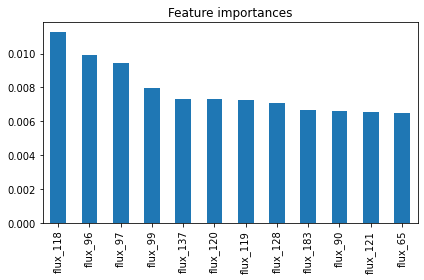

In [314]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [315]:
# singles M7-L7 + noise
# binaries: primary M7-L7, secondary T1-T8

In [326]:
RSEED = 42  

#remove 
feats = list(df_CutNoise1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_CutNoise1[feats]) #data
y0 = np.array(df_CutNoise1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [327]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.8738 !


In [328]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64      1125
           1       0.87      0.95      0.91      3710

    accuracy                           0.86      4835
   macro avg       0.82      0.75      0.78      4835
weighted avg       0.85      0.86      0.85      4835



In [329]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.54666667, 0.45333333],
       [0.04797844, 0.95202156]])

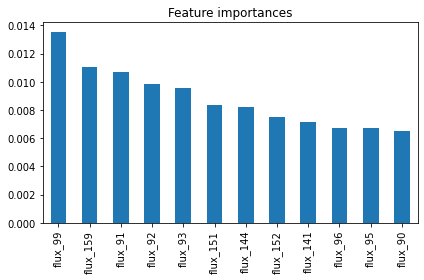

In [330]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [189]:
# singles all
# binaries: primary M7-L7, secondary T1-T8

In [190]:
RSEED = 42  

#remove 
feats = list(df_all1.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')

X0 = np.array(df_all1[feats]) #data
y0 = np.array(df_all1['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [191]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.9492 !


In [192]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.59      0.22      0.32       124
           1       0.95      0.99      0.97      1833

    accuracy                           0.94      1957
   macro avg       0.77      0.60      0.64      1957
weighted avg       0.93      0.94      0.93      1957



In [193]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.21774194, 0.78225806],
       [0.01036552, 0.98963448]])

In [194]:
# singles all
# binaries all

In [196]:
RSEED = 42  

#remove 
feats = list(df_all.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')
feats.remove('primary_type')
feats.remove('secondary_type')

X0 = np.array(df_all[feats]) #data
y0 = np.array(df_all['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [197]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.9886 !


In [198]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.99      1.00      0.99     10490

    accuracy                           0.99     10611
   macro avg       0.49      0.50      0.50     10611
weighted avg       0.98      0.99      0.98     10611



In [199]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.00000000e+00, 1.00000000e+00],
       [9.53288847e-04, 9.99046711e-01]])

In [215]:
# singles all
# binaries 0.01*all sample

In [305]:
RSEED = 42  

#remove 
feats = list(df_allSam.columns)
feats.remove('spectral_type')
feats.remove('num_class')
feats.remove('interpol_flux')
feats.remove('primary_type')
feats.remove('secondary_type')

X0 = np.array(df_allSam[feats]) #data
y0 = np.array(df_allSam['num_class']) #labels 

X_train, X_test, y_train, y_test = train_test_split(X0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

#let's build a random forest classifier 

RF = RandomForestClassifier(n_estimators =90)
RF.fit(X_train, y_train) #fitting to the training set 
test_preds = RF.predict(X_test) #predict on the test 

In [306]:
print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.5248 !


In [307]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       107
           1       0.52      0.50      0.51       107

    accuracy                           0.52       214
   macro avg       0.52      0.52      0.52       214
weighted avg       0.52      0.52      0.52       214



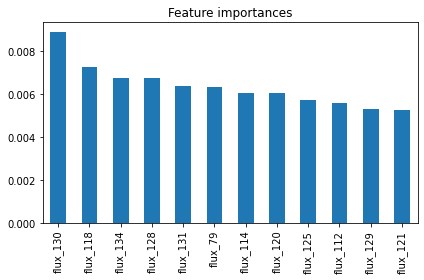

In [309]:
importances = RF.feature_importances_

forest_importances = pd.Series(importances, index=feats)
RF_10feats = forest_importances.nlargest(12)

fig, ax = plt.subplots()
RF_10feats.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()